In [33]:
import pandas as pd
import numpy as np

import seaborn as sns

# Microsoft Exploitability Index

In [34]:
df = pd.read_csv('../data_in/msrc/msrc_security_updates.csv')
df = df.rename(columns={"CVE Number": "cve"})
df

,Unnamed: 0,Release date,Last Updated,cve,CVE Number.1,CVE Title,Publicly Disclosed,Exploitability assessment,Exploited,Impact,Max Severity,Tag,Assigning CNA
0,0,"Oct 10, 2023","Oct 16, 2023",CVE-2023-44487,https://msrc.microsoft.com//update-guide/vulne...,MITRE: CVE-2023-44487 HTTP/2 Rapid Reset Attack,No,Exploitation Detected,Yes,Denial of Service,Important,HTTP/2,MITRE Corporation
1,1,"Oct 10, 2023","Oct 11, 2023",CVE-2023-36563,https://msrc.microsoft.com//update-guide/vulne...,Microsoft WordPad Information Disclosure Vulne...,Yes,Exploitation Detected,Yes,Information Disclosure,Important,Microsoft WordPad,Microsoft
2,2,"Oct 10, 2023","Oct 10, 2023",CVE-2023-41763,https://msrc.microsoft.com//update-guide/vulne...,Skype for Business Elevation of Privilege Vuln...,Yes,Exploitation Detected,Yes,Elevation of Privilege,Important,Skype for Business,Microsoft
3,3,"Sep 29, 2023","Sep 30, 2023",CVE-2023-5217,https://msrc.microsoft.com//update-guide/vulne...,Chromium: CVE-2023-5217 Heap buffer overflow i...,Yes,NaN,Yes,NaN,NaN,Microsoft Edge (Chromium-based),Chrome
4,4,"Sep 12, 2023","Oct 11, 2023",CVE-2023-4863,https://msrc.microsoft.com//update-guide/vulne...,Chromium: CVE-2023-4863 Heap buffer overflow i...,Yes,NaN,Yes,NaN,NaN,Microsoft Edge (Chromium-based),Chrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,228,"Sep 15, 2023","Sep 15, 2023",CVE-2023-4900,https://msrc.microsoft.com//update-guide/vulne...,Chromium: CVE-2023-4900 Inappropriate implemen...,NaN,NaN,NaN,NaN,NaN,Microsoft Edge (Chromium-based),Chrome
229,229,"Sep 7, 2023","Sep 7, 2023",CVE-2023-4764,https://msrc.microsoft.com//update-guide/vulne...,Chromium: CVE-2023-4764 Incorrect security UI ...,NaN,NaN,NaN,NaN,NaN,Microsoft Edge (Chromium-based),Chrome
230,230,"Sep 7, 2023","Sep 7, 2023",CVE-2023-4763,https://msrc.microsoft.com//update-guide/vulne...,Chromium: CVE-2023-4763 Use after free in Netw...,NaN,NaN,NaN,NaN,NaN,Microsoft Edge (Chromium-based),Chrome
231,231,"Sep 7, 2023","Sep 7, 2023",CVE-2023-4762,https://msrc.microsoft.com//update-guide/vulne...,Chromium: CVE-2023-4762 Type Confusion in V8,NaN,NaN,NaN,NaN,NaN,Microsoft Edge (Chromium-based),Chrome


In [35]:
df = df[['cve', 'Exploitability assessment', 'Exploited', 'Impact', 'Max Severity']]
df

,cve,Exploitability assessment,Exploited,Impact,Max Severity
0,CVE-2023-44487,Exploitation Detected,Yes,Denial of Service,Important
1,CVE-2023-36563,Exploitation Detected,Yes,Information Disclosure,Important
2,CVE-2023-41763,Exploitation Detected,Yes,Elevation of Privilege,Important
3,CVE-2023-5217,NaN,Yes,NaN,NaN
4,CVE-2023-4863,NaN,Yes,NaN,NaN
...,...,...,...,...,...
228,CVE-2023-4900,NaN,NaN,NaN,NaN
229,CVE-2023-4764,NaN,NaN,NaN,NaN
230,CVE-2023-4763,NaN,NaN,NaN,NaN
231,CVE-2023-4762,NaN,NaN,NaN,NaN


In [36]:
df_enriched = pd.read_csv('../data_out/nvd_cves_v3_enriched.csv.gz', compression="gzip")
df_enriched

,cve,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,confidentialityImpact,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
0,CVE-1999-0199,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00604,False,False,False,False,5
1,CVE-1999-0236,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,False,0.00137,True,False,False,False,4
2,CVE-2000-0258,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00590,False,False,False,False,5
3,CVE-2000-1254,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,False,0.00543,False,False,False,False,5
4,CVE-2002-20001,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00544,False,False,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141356,CVE-2023-5632,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00044,False,False,False,False,5
141357,CVE-2023-5638,5.4,LOW,NETWORK,REQUIRED,LOW,LOW,LOW,NONE,False,False,0.00051,False,False,False,False,5
141358,CVE-2023-5639,5.4,LOW,NETWORK,REQUIRED,LOW,LOW,LOW,NONE,False,False,0.00051,False,False,False,False,5
141359,CVE-2023-5642,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00890,False,False,False,False,5


In [37]:
df = pd.merge(df, df_enriched,  on='cve', how='left').fillna(False)
df

,cve,Exploitability assessment,Exploited,Impact,Max Severity,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,...,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
0,CVE-2023-44487,Exploitation Detected,Yes,Denial of Service,Important,7.5,LOW,NETWORK,NONE,NONE,...,NONE,HIGH,False,False,0.52748,False,True,True,False,0.0
1,CVE-2023-36563,Exploitation Detected,Yes,Information Disclosure,Important,6.5,LOW,NETWORK,REQUIRED,NONE,...,NONE,NONE,False,False,0.00332,False,True,True,False,0.0
2,CVE-2023-41763,Exploitation Detected,Yes,Elevation of Privilege,Important,5.3,LOW,NETWORK,NONE,NONE,...,NONE,NONE,False,False,0.0098,False,True,True,False,0.0
3,CVE-2023-5217,False,Yes,False,False,8.8,LOW,NETWORK,REQUIRED,NONE,...,HIGH,HIGH,False,False,0.24402,False,True,True,True,0.0
4,CVE-2023-4863,False,Yes,False,False,8.8,LOW,NETWORK,REQUIRED,NONE,...,HIGH,HIGH,False,False,0.4101,False,True,True,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,CVE-2023-4900,False,False,False,False,4.3,LOW,NETWORK,REQUIRED,NONE,...,LOW,NONE,False,False,0.00124,False,False,True,False,5.0
229,CVE-2023-4764,False,False,False,False,6.5,LOW,NETWORK,REQUIRED,NONE,...,HIGH,NONE,False,False,0.00133,False,False,True,False,5.0
230,CVE-2023-4763,False,False,False,False,8.8,LOW,NETWORK,REQUIRED,NONE,...,HIGH,HIGH,False,False,0.00229,False,False,True,False,5.0
231,CVE-2023-4762,False,False,False,False,8.8,LOW,NETWORK,REQUIRED,NONE,...,HIGH,HIGH,False,False,0.00969,False,False,True,True,5.0


In [38]:
df['Exploitability assessment'].value_counts()

Exploitation Less Likely    163
False                        38
Exploitation More Likely     24
Exploitation Detected         5
Exploitation Unlikely         3
Name: Exploitability assessment, dtype: int64

In [39]:
# Drop rows where 'Exploitability assessment' has a value False
df_msei = df.drop(df[df['Exploitability assessment'] == False].index)
df_msei

,cve,Exploitability assessment,Exploited,Impact,Max Severity,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,...,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
0,CVE-2023-44487,Exploitation Detected,Yes,Denial of Service,Important,7.5,LOW,NETWORK,NONE,NONE,...,NONE,HIGH,False,False,0.52748,False,True,True,False,0.0
1,CVE-2023-36563,Exploitation Detected,Yes,Information Disclosure,Important,6.5,LOW,NETWORK,REQUIRED,NONE,...,NONE,NONE,False,False,0.00332,False,True,True,False,0.0
2,CVE-2023-41763,Exploitation Detected,Yes,Elevation of Privilege,Important,5.3,LOW,NETWORK,NONE,NONE,...,NONE,NONE,False,False,0.0098,False,True,True,False,0.0
5,CVE-2023-36761,Exploitation Detected,Yes,Information Disclosure,Important,5.3,LOW,NETWORK,NONE,NONE,...,NONE,NONE,False,False,0.57125,False,True,True,True,0.0
6,CVE-2023-36802,Exploitation Detected,Yes,Elevation of Privilege,Important,7.8,LOW,LOCAL,NONE,LOW,...,HIGH,HIGH,False,False,0.00054,False,True,True,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CVE-2022-41113,Exploitation More Likely,No,Elevation of Privilege,Important,7.8,LOW,LOCAL,NONE,LOW,...,HIGH,HIGH,False,False,0.00048,False,False,True,False,5.0
196,CVE-2022-37967,Exploitation More Likely,No,Elevation of Privilege,Critical,7.2,LOW,NETWORK,NONE,HIGH,...,HIGH,HIGH,False,False,0.09894,False,False,True,False,5.0
197,CVE-2022-26928,Exploitation Less Likely,No,Elevation of Privilege,Important,7.0,HIGH,LOCAL,NONE,LOW,...,HIGH,HIGH,False,False,0.00043,False,False,True,False,5.0
198,CVE-2022-35825,Exploitation Less Likely,No,Remote Code Execution,Important,8.8,LOW,NETWORK,REQUIRED,NONE,...,HIGH,HIGH,False,False,0.02658,False,False,True,False,5.0


In [46]:
# Convert the category column to numerical values 
# Create a mapping dictionary
category_to_number = {'Exploitation Detected': 0, 'Exploitation More Likely': 1, 'Exploitation Less Likely': 2, 'Exploitation Unlikely': 3}

# Map the 'category_column' to numerical values
df_msei['msei'] = df_msei['Exploitability assessment'].map(category_to_number)

df_msei

,cve,Exploitability assessment,Exploited,Impact,Max Severity,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,...,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,msei
0,CVE-2023-44487,Exploitation Detected,Yes,Denial of Service,Important,7.5,LOW,NETWORK,NONE,NONE,...,HIGH,False,False,0.52748,False,True,True,False,0.0,0
1,CVE-2023-36563,Exploitation Detected,Yes,Information Disclosure,Important,6.5,LOW,NETWORK,REQUIRED,NONE,...,NONE,False,False,0.00332,False,True,True,False,0.0,0
2,CVE-2023-41763,Exploitation Detected,Yes,Elevation of Privilege,Important,5.3,LOW,NETWORK,NONE,NONE,...,NONE,False,False,0.0098,False,True,True,False,0.0,0
5,CVE-2023-36761,Exploitation Detected,Yes,Information Disclosure,Important,5.3,LOW,NETWORK,NONE,NONE,...,NONE,False,False,0.57125,False,True,True,True,0.0,0
6,CVE-2023-36802,Exploitation Detected,Yes,Elevation of Privilege,Important,7.8,LOW,LOCAL,NONE,LOW,...,HIGH,False,False,0.00054,False,True,True,True,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CVE-2022-41113,Exploitation More Likely,No,Elevation of Privilege,Important,7.8,LOW,LOCAL,NONE,LOW,...,HIGH,False,False,0.00048,False,False,True,False,5.0,1
196,CVE-2022-37967,Exploitation More Likely,No,Elevation of Privilege,Critical,7.2,LOW,NETWORK,NONE,HIGH,...,HIGH,False,False,0.09894,False,False,True,False,5.0,1
197,CVE-2022-26928,Exploitation Less Likely,No,Elevation of Privilege,Important,7.0,HIGH,LOCAL,NONE,LOW,...,HIGH,False,False,0.00043,False,False,True,False,5.0,2
198,CVE-2022-35825,Exploitation Less Likely,No,Remote Code Execution,Important,8.8,LOW,NETWORK,REQUIRED,NONE,...,HIGH,False,False,0.02658,False,False,True,False,5.0,2


In [47]:
df_msei['msei'].value_counts()

2    163
1     24
0      5
3      3
Name: msei, dtype: int64

/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(

Text(0.5, 0.98, 'Microsoft Exploitability Index vs EPSS')

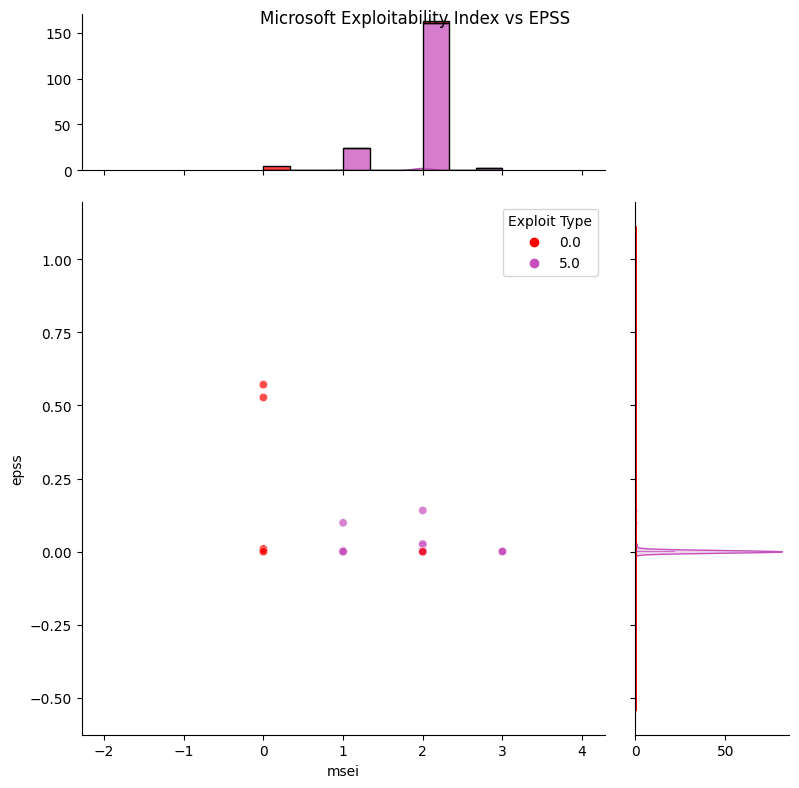

In [49]:
palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

g=sns.jointplot(data=df_msei, x='msei', y='epss', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
g.ax_joint.legend(handles=handles, labels = ['CISA KEV', 'both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'], title="Exploit Type")
g.ax_joint.legend(handles=handles, title="Exploit Type")

g.plot_marginals(sns.histplot, multiple="stack")
g.fig.suptitle("Microsoft Exploitability Index vs EPSS")